In [75]:
class Engine:
    def __init__(self, power, ratio_gears, ratio_differential, radius_wheel, torque_map):
        self.power = power
        self.ratio_gears = ratio_gears
        self.ratio_differential = ratio_differential
        self.radius_wheel = radius_wheel
        self.torque_map = torque_map

        self.gear = 0


In [76]:
def torque_map(rpm):
    a = -0.000125 / 100
    b = 2.5 / 100
    c = -500 / 100
    return a * rpm * rpm + b * rpm + c

engine = Engine(
    power=500,
    ratio_gears=[3.5, 2.8, 2.1, 1.7, 1.3, 1],
    ratio_differential=1,
    radius_wheel=0.3,
    torque_map = torque_map
)

Text(0, 0.5, 'Torque (Nm)')

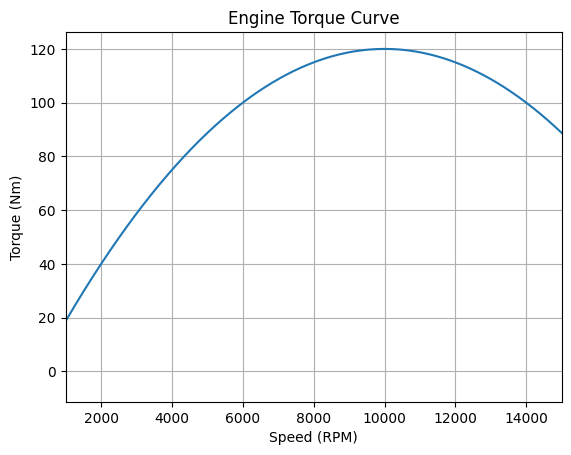

In [77]:
import numpy as np

rpms = np.arange(0, 15000)
torque = [engine.torque_map(rpm) for rpm in rpms]

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(torque)
ax.grid()
ax.set_xlim([1000, np.max(rpms)])
ax.set_title('Engine Torque Curve')
ax.set_xlabel('Speed (RPM)')
ax.set_ylabel('Torque (Nm)')